In [1]:
#!/usr/bin/python
# -*- coding: UTF-8 -*-
# .Data:.2019/12/27
# -*- coding: utf-8 -*-
 
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import pydotplus
 
import warnings
warnings.filterwarnings("ignore")
 
#加载数据
iris = datasets.load_iris()
 
#构建模型
fls = DecisionTreeClassifier()
fls = fls.fit(iris.data,iris.target)
 
#保存模型
with open('iris.dot','w') as f:
    f = tree.export_graphviz(fls,out_file=f)
 
#画图，保存到pdf文件中
 
#设置图像参数
dot_data = tree.export_graphviz(fls,out_file=None,
                                feature_names=iris.feature_names,
                                class_names=iris.target_names,
                                filled=True,rounded=True,special_characters=True)
 
graph = pydotplus.graph_from_dot_data(dot_data)
 
#保存图像到pdf文件
graph.write_pdf('iris.pdf')


True

In [10]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [53]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV   #网格搜索
from sklearn.model_selection import cross_val_score #交叉验证
from sklearn.model_selection import cross_validate#交叉验证
from sklearn.metrics import matthews_corrcoef
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
import matplotlib.pyplot as plt
# from imblearn.over_sampling import RandomOverSampler #随机过采样
import pydotplus
import pandas as pd
import math
import joblib
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import numpy as np
import warnings
warnings.filterwarnings("ignore")

## DT visualization

In [51]:
df = pd.read_csv("./data/ads_3.csv")

X = df[df.columns[:62]]
Y = df[df.columns[62:]]
Y = round(Y*5).astype(int)

In [52]:
recall = []
f1_score = []
acc_validation = []
acc_test = []
feature_importance = []
MCC = []

for i in range(12):
    y = Y[Y.columns[i]]
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size=0.7)

    params = {
        "max_depth":range(2,11),
        'criterion':["gini", "entropy"],
        'splitter':["random", "best"],
        'min_samples_leaf':[1,2,4,6,8,10],
        'min_samples_split':[2,4,6,8,10,15],
        'max_features':[3,5,10,20,30,60]
    }
    
    DT_classification = DecisionTreeClassifier()
    model = GridSearchCV(DT_classification, param_grid=params, cv=5)
    model.fit(X_train, y_train)
    max_depth= model.best_params_["max_depth"]
    criterion= model.best_params_["criterion"]
    splitter = model.best_params_["splitter"]
    min_samples_leaf= model.best_params_["min_samples_leaf"]
    min_samples_split = model.best_params_["min_samples_split"]
    max_features = model.best_params_["max_features"]


    DT_classification = DecisionTreeClassifier(random_state=0, max_depth=max_depth, criterion=criterion, splitter=splitter, min_samples_leaf=min_samples_leaf, min_samples_split=min_samples_split, max_features=max_features)
    
    cv_score = cross_validate(DT_classification,
                               X,
                               y,
                               cv=5,
                               scoring=["accuracy","recall_macro","f1_macro"]

    )
    recall.append(cv_score["test_recall_macro"].mean())
    f1_score.append(cv_score["test_f1_macro"].mean())
    acc_validation.append(cv_score["test_accuracy"].mean())
    
    
    DT_classification = DecisionTreeClassifier(random_state=0, max_depth=max_depth, criterion=criterion, splitter=splitter, min_samples_leaf=min_samples_leaf, min_samples_split=min_samples_split, max_features=max_features)
    DT_classification.fit(X_train, y_train)
    acc_test.append(DT_classification.score(X_test, y_test))
    MCC.append(matthews_corrcoef(y_test, DT_classification.predict(X_test)))

    # #保存模型
    # with open('./result/DT_visualization/DTC{}.dot'.format(i+1),'w') as f:
    #     f = tree.export_graphviz(DT_classification,out_file=f)
    
    # #画图，保存到pdf文件中
    
    # #设置图像参数
    # dot_data = tree.export_graphviz(DT_classification,out_file=None,
    #                                 feature_names=list(X.columns),
    #                                 class_names=[str(x) for x in list(set(y))],
    #                                 filled=True,rounded=True,special_characters=True)
    
    # graph = pydotplus.graph_from_dot_data(dot_data)
    
    # #保存图像到pdf文件
    # graph.write_pdf('./result/DT_visualization/DTC{}.pdf'.format(i+1))

    # joblib.dump(DT_classification, "model/DT_optimized_classification/model{}.pkl".format(i+1))

    feature_importance.append(list(DT_classification.feature_importances_))

    print(recall)
    print(f1_score)
    print(acc_test)
    

[0.46419680677745195]
[0.4534327656439582]
[0.7580645161290323]


KeyboardInterrupt: 

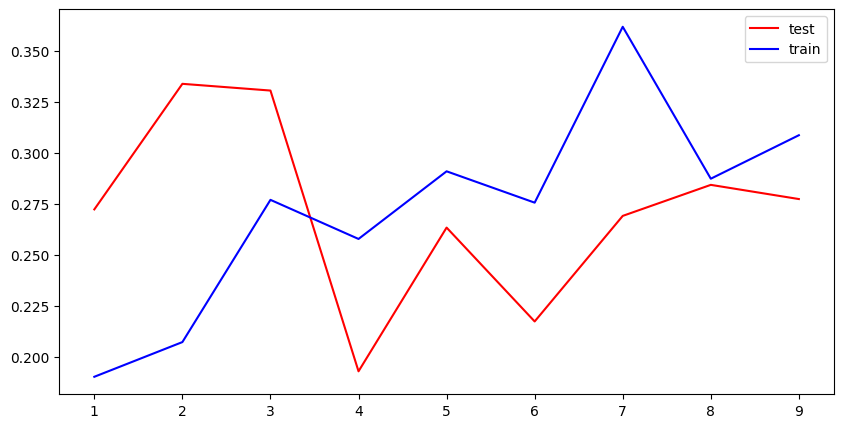

In [35]:
auc_tests = []
auc_trains = []
y = Y[Y.columns[0]]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size=0.7)

for i in range(1,10):
    clf = tree.DecisionTreeClassifier(
                            criterion='gini',#Criterion这个参数正是用来决定不纯度的计算方法的
                            splitter='best',#决策树在分枝时虽然随机，但是还是会优先选择更重要的特征进行分枝
                            max_depth=i,#限制树的最大深度，超过设定深度的树枝全部剪掉
                            min_samples_split=2,#一个节点在分枝后的每个子节点都必须包含至少min_samples_leaf个训练样本
                            min_samples_leaf=1,#min_samples_split限定，一个节点必须要包含至少min_samples_split个训练样本，
                            min_weight_fraction_leaf=0.0,#基于权重的剪枝参数
                            max_features=50,#max_features限制分枝时考虑的特征个数，超过限制个数的特征都会被舍弃
                            random_state=None,
                            max_leaf_nodes=None,
                            min_impurity_decrease=0.0,#限制基尼指数的大小，基尼指数小于设定数值的分枝不会发生。
                            class_weight=None,#完成样本标签平衡的参数
                            ccp_alpha=0.0,)
    clf.fit(X_train, y_train)
    train_auc = cross_val_score(clf, X_train, y_train, cv=5, scoring='f1_macro').mean()
    test_auc = cross_val_score(clf, X_test, y_test, cv=5, scoring='f1_macro').mean()
    auc_trains.append(train_auc)
    auc_tests.append(test_auc)

    
plt.figure(figsize=(10,5))
plt.plot(range(1,10), auc_tests, c='r', label='test')
plt.plot(range(1,10), auc_trains, c='b', label='train')
plt.xticks(range(1,10))
plt.legend()
plt.show()


In [58]:
df = pd.read_csv("./data/ads_3.csv")

X = df[df.columns[:62]]
Y = df[df.columns[62:]]
Y = round(Y*5).astype(int)

In [59]:
feature_importance = []
recall = []
f1_score = []
acc_validation = []
acc_test = []
mcc = []
for i in range(12):
    y = Y[Y.columns[i]]
    # 过采样
    X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    shuffle=True,
                                                    test_size=0.3,
                                                    random_state=0)
    # ros = RandomOverSampler()  
    # X_train, y_train = ros.fit_resample(X_train, y_train)   
    
    #网格搜索参数优化
    params = {
        "n_estimators":[10,50,100,150,200],
        'max_depth':range(2,11),
        'max_features':[2,5,10],
        'min_samples_leaf':[1,2,4,6,8,10],
        'min_samples_split':[2,4,6,8,10,15],
        'criterion':['gini', 'entropy']
    }
    
    RF_classification = RandomForestClassifier()
    model = GridSearchCV(RF_classification, param_grid=params, cv=5)
    model.fit(X_train, y_train)
    n_estimators = model.best_params_["n_estimators"]
    max_depth = model.best_params_["max_depth"]
    max_features = model.best_params_["max_features"]
    min_samples_leaf = model.best_params_["min_samples_leaf"]
    min_samples_split = model.best_params_["min_samples_split"]
    criterion = model.best_params_["criterion"]

    RF_classification = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, max_features=max_features, min_samples_leaf=min_samples_leaf, min_samples_split=min_samples_split, criterion=criterion)
    cv_score = cross_validate(RF_classification       #实例化的模型
				, X   #完整的特征值
				, y #完整的目标值
				, cv=5         #几折交叉验证
				,scoring = ["accuracy","recall_micro","f1_micro"]   
				)
    

    recall.append(cv_score["test_recall_micro"].mean())
    f1_score.append(cv_score["test_f1_micro"].mean())
    acc_validation.append(cv_score["test_accuracy"].mean())


    RF_classification = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, max_features=max_features, min_samples_leaf=min_samples_leaf, min_samples_split=min_samples_split, criterion=criterion)
    RF_classification.fit(X_train, y_train)

    # joblib.dump(RF_classification, "model/RF_optimized_classification/model{}.pkl".format(i+1))
    acc_test.append(RF_classification.score(X_test,y_test))
    mcc.append(matthews_corrcoef(y_test,RF_classification.predict(X_test)))
    
    feature_importance.append(list(RF_classification.feature_importances_))

    print(acc_test)
    print(mcc)
    break


KeyboardInterrupt: 